<xarray.Dataset> Size: 8kB
Dimensions:  (mixer: 2, time: 400)
Coordinates:
  * mixer    (mixer) <U1 8B 'I' 'Q'
  * time     (time) int32 2kB 16 36 56 76 96 116 ... 7916 7936 7956 7976 7996
Data variables:
    q1_ro    (mixer, time) float64 6kB ...
Attributes:
    start_time:  20240830_205038
    end_time:    20240830_205109
q1_ro
Parameters([('amp', <Parameter 'amp', value=1.589275172709012e-05 +/- 3.69e-07, bounds=[-inf:inf]>), ('tau', <Parameter 'tau', value=1.7127412081317668 +/- 0.0895, bounds=[0:7.996]>), ('offset', <Parameter 'offset', value=9.815658944312133e-05 +/- 1.77e-07, bounds=[-1.0:1.0]>)])


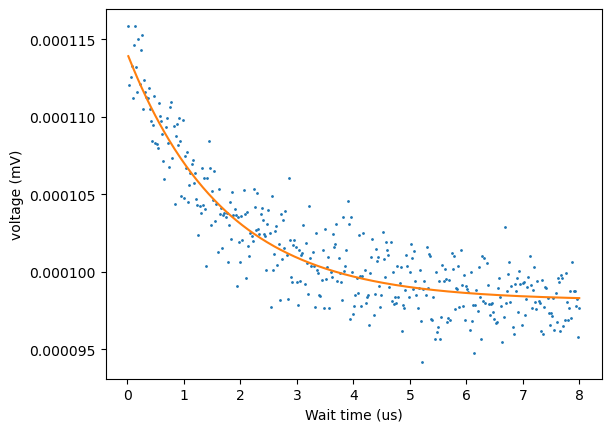

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import netCDF4
import h5netcdf
dataset = xr.open_dataset(r"d:\Data\Qubit\TSRI124_TJ6XQ_11_AS1604\q1\20240830_205109_T1_stat\T1_stat.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000

from qcat.visualization.qubit_relaxation import plot_qubit_relaxation
from qcat.analysis.qubit.relaxation import qubit_relaxation_fitting

for ro_name, data in dataset.data_vars.items():
    print(ro_name)
    fit_result = qubit_relaxation_fitting(time, -1*data.values[0])
    print(fit_result.params)
    fig, ax = plt.subplots()
    plot_qubit_relaxation(time, -1*data[0], ax, fit_result)

T1 Histogram

<xarray.Dataset>
Dimensions:     (repetition: 100, mixer: 2, time: 100)
Coordinates:
  * mixer       (mixer) <U1 'I' 'Q'
  * time        (time) int32 16 36 56 76 96 116 ... 1916 1936 1956 1976 1996
  * repetition  (repetition) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
Data variables:
    q2_ro       (repetition, mixer, time) float64 ...
Attributes:
    start_time:  20240822_222455
    end_time:    20240822_222504
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_plot_T1_trace', '_plot_T2_trace', 'np', 'plot_qubit_T1_relaxation_hist', 'plot_qubit_T2_relaxation_hist', 'plot_qubit_relaxation', 'plot_time_dep_qubit_T1_relaxation_2Dmap', 'plot_time_dep_qubit_T2_relaxation_2Dmap', 'plt']
[0.12783021448795748, 0.13188798748276714, 0.1498891149121351, 0.10864666938322144, 0.11875866654190839, 0.12392834225903983, 0.16271758658615737, 0.1570136864606122, 0.12458629044429798, 0.12965341023098448, 0.13009886020053618, 0.11186269

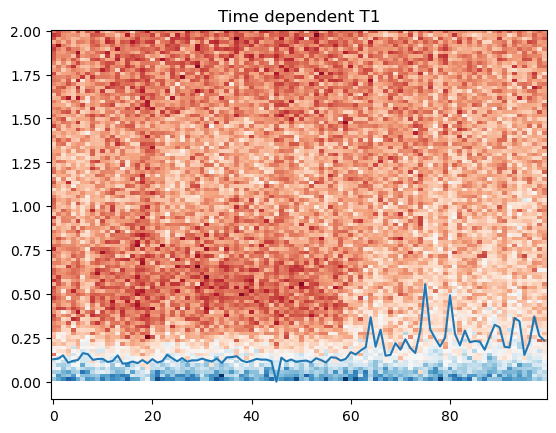

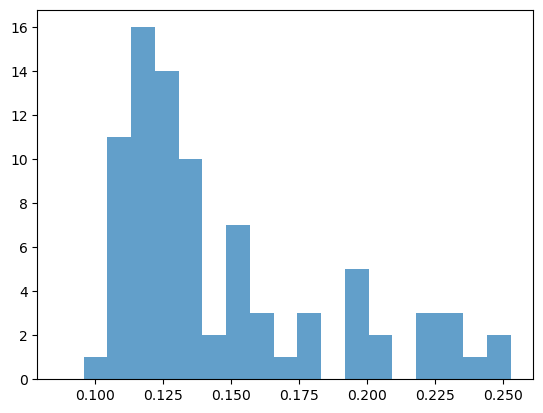

In [8]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

dataset = xr.open_dataset(r"d:\20240822_2240__T1_stat_q2.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000
import qcat.visualization.qubit_relaxation as qv

print(dir(qv))

from qcat.visualization.qubit_relaxation import plot_time_dep_qubit_T1_relaxation_2Dmap, plot_qubit_T1_relaxation_hist
from qcat.analysis.qubit.relaxation import qubit_relaxation_fitting


rep = dataset.coords["repetition"].values

dataset = dataset.transpose("mixer", "repetition", "time")
single_name = "q2_ro"
for ro_name, data in [(single_name, dataset[single_name])]:
    acc_T1 = []
    for i in range(rep.shape[-1]):
        fit_result = qubit_relaxation_fitting(time, data.values[0][i])
        acc_T1.append(fit_result.params["tau"].value)
    fig, ax = plt.subplots()
    plot_time_dep_qubit_T1_relaxation_2Dmap( rep, time, data.values[0], ax, fit_result=acc_T1)
    print(acc_T1)
    fig1, ax1 = plt.subplots()

    plot_qubit_T1_relaxation_hist( np.array(acc_T1), ax1 )
    print(np.std(acc_T1))
